# Problem Set 2 (Total: 64 points)

<b>A Small Intro </b>

For this assignment, we will be using Cook County's (in Illinois) sentencing dataset. This dataset reports the sentence given to defendants convicted of different crimes.

# 0. Load packages and imports

In [1]:
## basic functionality
import pandas as pd
import numpy as np
import re
import datetime                  # to clean up date columns
import math                      # infinity series for the plotnine plots
from datetime import date
from datetime import timedelta

## plotting
## note: you likely need to install this using
## pip or conda; you can delete this line
## if you're using matplotlib, seaborn, or other
## plotting pkg
import plotnine
from plotnine import *

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## datetime util
from dateutil.relativedelta import relativedelta

## 0.1 Load the data (0 points)

Use `pd.read_csv` to load the `sentencing_asof0405.csv` data (make sure to unzip the `pset2_inputdata` folder and not hard code your user-specific path name)

*Notes*: You may receive a warning about mixed data types upon import; feel free to ignore

In [3]:
# make sure that your current notebook directory is in the same folder as the csv data! 
case_data = pd.read_csv('sentencing_asof0405.csv', low_memory=False)

## 0.2 Print head, dimensions, info for the data (0 points)

In [4]:
# printing the data head -- displaying all columns
pd.set_option('display.max_columns', None)
case_data.head()

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,DISPOSITION_CHARGED_CHAPTER,DISPOSITION_CHARGED_ACT,DISPOSITION_CHARGED_SECTION,DISPOSITION_CHARGED_CLASS,DISPOSITION_CHARGED_AOIC,CHARGE_DISPOSITION,CHARGE_DISPOSITION_REASON,SENTENCE_JUDGE,SENTENCE_COURT_NAME,SENTENCE_COURT_FACILITY,SENTENCE_PHASE,SENTENCE_DATE,SENTENCE_TYPE,CURRENT_SENTENCE_FLAG,COMMITMENT_TYPE,COMMITMENT_TERM,COMMITMENT_UNIT,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,RACE,GENDER,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510112469,116304211997,FIRST DEGREE MURDER,2,12/17/2014 12:00:00 AM,38,-,9-1(a)(2),X,0000001607,Nolle On Remand,NaN,John Mannion,District 6 - Markham,Markham Courthouse,Original Sentencing,6/2/1986 12:00:00 AM,Conversion,True,Natural Life,NaN,NaN,619.0,27.0,Black,Male,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
1,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510213021,98265074680,HOME INVASION,14,12/17/2014 12:00:00 AM,38-12-11-A(2),NaN,NaN,X,0000001847,Nolle On Remand,NaN,John Mannion,District 6 - Markham,Markham Courthouse,Original Sentencing,6/2/1986 12:00:00 AM,Conversion,True,Illinois Department of Corrections,030,Year(s),619.0,27.0,Black,Male,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
2,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516447217,131972895911,FIRST DEGREE MURDER,4,12/17/2014 12:00:00 AM,38,-,9-1(a)(3),X,0000001608,Nolle On Remand,NaN,John Mannion,District 6 - Markham,Markham Courthouse,Original Sentencing,6/2/1986 12:00:00 AM,Conversion,True,Natural Life,NaN,NaN,619.0,27.0,Black,Male,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
3,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516497493,131966356472,FIRST DEGREE MURDER,5,12/17/2014 12:00:00 AM,38,-,9-1(a)(3),X,0000001608,Nolle On Remand,NaN,John Mannion,District 6 - Markham,Markham Courthouse,Original Sentencing,6/2/1986 12:00:00 AM,Conversion,True,Natural Life,NaN,NaN,619.0,27.0,Black,Male,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
4,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516648320,98059642859,HOME INVASION,13,12/17/2014 12:00:00 AM,38-12-11-A(1),NaN,NaN,X,0000001846,Plea Of Guilty,NaN,Clayton Jay Crane,District 6 - Markham,Markham Courthouse,Amended/Corrected Sentencing,10/16/2014 12:00:00 AM,Prison,True,Illinois Department of Corrections,30,Year(s),10982.0,27.0,Black,Male,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide


In [5]:
# printing the data dimensions 
case_data.shape        
# the data has 41 columns and 248146 rows

# what about its info?
case_data.info()

(248146, 41)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248146 entries, 0 to 248145
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   CASE_ID                            248146 non-null  int64  
 1   CASE_PARTICIPANT_ID                248146 non-null  int64  
 2   RECEIVED_DATE                      248146 non-null  object 
 3   OFFENSE_CATEGORY                   248146 non-null  object 
 4   PRIMARY_CHARGE_FLAG                248146 non-null  bool   
 5   CHARGE_ID                          248146 non-null  int64  
 6   CHARGE_VERSION_ID                  248146 non-null  int64  
 7   DISPOSITION_CHARGED_OFFENSE_TITLE  248146 non-null  object 
 8   CHARGE_COUNT                       248146 non-null  int64  
 9   DISPOSITION_DATE                   248146 non-null  object 
 10  DISPOSITION_CHARGED_CHAPTER        248146 non-null  object 
 11  DISPOSITION_CHARGED_ACT            2427

# Part one: data cleaning/interpretation (28 points)

## 1.1: Understanding the unit of analysis (5 points)


### 1.1.1 Print the number of unique values for the following columns. Do so in a way that avoids copying/pasting code for the three (eg apply):

    - Cases (CASE_ID)
    - People (CASE_PARTICIPANT_ID)
    - Charges (CHARGE_ID)


**Sources for this question**: slide 21 here on column-wise apply: https://github.com/rebeccajohnson88/PPOL564_slides_activities/blob/main/slides/fall_22/02_ppol564_f22_datawrangling.pdf

In [6]:
# summarizing the number of unique values across multiple columns in the df
case_data[['CASE_ID', 'CASE_PARTICIPANT_ID', 'CHARGE_ID']].apply(lambda x: len(pd.unique(x)))

CASE_ID                197519
CASE_PARTICIPANT_ID    211977
CHARGE_ID              229015
dtype: int64

### 1.1.2   Write a couple sentences on the following and show an example of each (e.g., a case involving multiple people):
   
- Why there are more unique people than unique cases?
- Why there are more unique charges than unique people?

**Resources**: groupby and agg covered in:
- This activity: https://github.com/rebeccajohnson88/PPOL564_slides_activities/blob/main/activities/fall_22/solutions/01_pandas_datacleaning_solutions.ipynb

- These lecture slides: https://github.com/rebeccajohnson88/PPOL564_slides_activities/blob/main/slides/fall_22/02_ppol564_f22_datawrangling.pdf

There are more unique people than unique cases because there are cases that involve multiple people, i.e. there are CASE_ID having more than one unique CASE_PARTICIPANT_ID.

In [7]:
# aggregating the number of unique people per cases 
case_data_unique_cases = case_data.groupby('CASE_ID').agg(unique_participants = ('CASE_PARTICIPANT_ID', lambda x: len(pd.unique(x))))

# looking at cases where there are more than 1 unique people 
case_data_unique_cases.loc[case_data_unique_cases['unique_participants'] > 1]

,unique_participants
CASE_ID,
166402790922,2
176098576921,2
176270837451,2
180953886081,2
181880245351,4
...,...
442924851235,2
443338247136,2
443405066012,2


In [8]:
# looking at the distribution of unique_participants
case_data_unique_cases['unique_participants'].value_counts(normalize = True)

1     0.937788
2     0.053828
3     0.006673
4     0.001281
5     0.000294
6     0.000041
7     0.000035
8     0.000020
9     0.000015
17    0.000010
13    0.000010
10    0.000005
Name: unique_participants, dtype: float64

The above summaries tell us that there are 12288 cases (around 6%) with more than 1 unique people, and this helps explain why there are more unique people than there are unique cases.

Next, we investigate why there are more unique charges than there are unique people.

In [9]:
# why are there more unique charges than unique people?
case_data_unique_people = case_data.groupby('CASE_PARTICIPANT_ID').agg(unique_charges = ('CHARGE_ID', lambda x: len(pd.unique(x))))

# printing the head 
case_data_unique_people.head()

,unique_charges
CASE_PARTICIPANT_ID,
96757475659,1
97064562856,1
97249060542,1
97581722610,4
97603050731,2


One possible explanation for having more unique charges than people is because one person can have multiple charges. `CASE_PARTICIPANT_ID 97581722610`, for example, has four charges. Looking at the offense title column suggests that the participant is charged with homicide of unbord child, two murders, and armed robbery. 

In [10]:
# filtering for case 97581722610, and selecting several columns only
case_data.loc[case_data['CASE_PARTICIPANT_ID'] == 97581722610][['CASE_PARTICIPANT_ID', 'CHARGE_ID', 'DISPOSITION_CHARGED_OFFENSE_TITLE', 'DISPOSITION_CHARGED_CHAPTER']]

,CASE_PARTICIPANT_ID,CHARGE_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,DISPOSITION_CHARGED_CHAPTER
10561,97581722610,138443602912,INT HOMI OF UNBORN CHILD=38-9-1.2,INT HOMI UNBORN
10562,97581722610,138495990272,MURDER=720-5\9-1(A)(1-3),MUR
10563,97581722610,138496040547,ARMED ROBBERY=720-5\18-2(A),AR
10564,97581722610,138495939996,MURDER=720-5\9-1(A)(1-3),MUR
10565,97581722610,138495939996,MURDER=720-5\9-1(A)(1-3),MUR


Further tabulation shows that, like the above case, around 7% of participant IDs have more than one charges. This explains why there are more than unique charges than there are unique participants.  

In [11]:
# summarising the number of unique charges per person 
case_data_unique_people['unique_charges'].value_counts(normalize = True)

1     0.931375
2     0.048807
3     0.008421
4     0.004500
6     0.001849
5     0.001722
7     0.000863
8     0.000793
9     0.000476
10    0.000396
12    0.000226
11    0.000132
13    0.000066
14    0.000061
15    0.000042
16    0.000042
20    0.000033
17    0.000033
18    0.000028
22    0.000014
27    0.000014
23    0.000014
25    0.000014
21    0.000009
28    0.000009
59    0.000005
26    0.000005
19    0.000005
42    0.000005
29    0.000005
54    0.000005
24    0.000005
47    0.000005
99    0.000005
74    0.000005
81    0.000005
36    0.000005
Name: unique_charges, dtype: float64


### 1.1.3 Finding mean and median 

- Print the mean and median number of charges per `CASE_PARTICIPANT_ID`

- Print the mean and median number of participants per `CASE_ID`


In [12]:
# finding the mean and median number of charges per participants 
case_data_unique_people.agg(mean = ('unique_charges', 'mean'),
                           median = ('unique_charges', 'median'))

,unique_charges
mean,1.126146
median,1.000000


In [13]:
# same, but for N of participants per CASE_ID 
case_data_unique_cases.agg(mean = ('unique_participants', 'mean'),
                           median = ('unique_participants', 'median'))

,unique_participants
mean,1.073198
median,1.000000


### 1.1.4 Does the data seem to enable us to follow the same defendant across different cases they're charged in? Write 1 sentence in support of your conclusion.

No, the data does not enable us to track defendants across different cases, because the participant ID is assigned based on their cases. This can be seen from the code chunk below, which shows that there is only one unique case within each participant ID. Even if the same person has different cases, that person will have different participant IDs because the case ID is different.

In [14]:
# are there any different CASE_ID within each CASE_PARTICIPANT_ID?
case_data_unique_partid = case_data.groupby('CASE_PARTICIPANT_ID').agg(unique_caseid = ('CASE_ID', lambda x: len(pd.unique(x))))

# tabulating the value_counts within each CASE_PARTICIPANT_ID 
case_data_unique_partid['unique_caseid'].value_counts()

1    211977
Name: unique_caseid, dtype: int64

## 1.2.1 Which offense is final? (3 points)

- First, read the data documentation (link here: https://datacatalog.cookcountyil.gov/api/views/tg8v-tm6u/files/8597cdda-f7e1-44d1-b0ce-0a4e43f8c980?download=true&filename=CCSAO%20Data%20Glossary.pdf) and summarize in your own words the differences between `OFFENSE_CATEGORY` and `UPDATED_OFFENSE_CATEGORY` 

- Construct an indicator `is_changed_offense` that's True for case-participant-charge observations (rows) where there's a difference between the `OFFENSE_CATEGORY` and the `UPDATED_OFFENSE_CATEGORY`. What are some of the more common changed offenses? (can just print result of sort_values based on `OFFENSE_CATEGORY`)

- Print one example of a changed offense from one of these categories and comment on what the reason may be

**Resources**: row subsetting, groupby/agg, and np.where covered in lecture slides
 

*Answer*: 

`OFFENSE_CATEGORY` specifies the type of offense committed by the defendant before charges are filed on that case. However, as cases evolve, the types of offense could also change with ongoing investigations. `UPDATED_OFFENSE_CATEGORY` contains such updated offense category; it can have the same or different offense category with the `OFFENSE_CATEGORY` column.

In [15]:
# generating the is_changed_offense column
case_data['is_changed_offense'] = np.where(case_data.OFFENSE_CATEGORY == case_data.UPDATED_OFFENSE_CATEGORY, False, True)

# sorting the values based on OFFENSE_CATEGORY
case_data.groupby('OFFENSE_CATEGORY').agg({'is_changed_offense': 'sum'}).sort_values('is_changed_offense', ascending = False).head(10)

,is_changed_offense
OFFENSE_CATEGORY,
PROMIS Conversion,6394
DUI,3896
UUW - Unlawful Use of Weapon,2155
Other Offense,2125
Aggravated Battery,1927
Burglary,1513
Attempt Homicide,1174
Theft,1025
Domestic Battery,793


Based on the table above, the most commonly changed offense types include:
* PROMIS Conversion
* DUI
* Unlawful Use of Weapon
* Other Offense
* Aggravated Battery
* Burglary
* Attempt Homicide
* Theft
* Domestic Battery
* Aggravated DUI

The below code chunk displays an example of case where the initial offense category is changed (`CASE_ID == 419413124564`). 

Initially, the defendant was charged with robbery offense. But then as the case developed, the offense was changed to aggravated robbery. This could happen if further investigation process revealed that the defendant committed all four elements of aggravated robbery:
1. Taking a property from another person 
2. Taking a property from another person or presence
3. Taking by violence or intimidation
4. Involving the use of a dangerous weapon

The fourth element crucially distinguishes aggravated robbery from the robbery offense category. 

In [16]:
# selecting only the offense_category columns, and filtering only for rows whose offense category is changed. 
case_data[['CASE_ID', 'OFFENSE_CATEGORY', 'UPDATED_OFFENSE_CATEGORY']].loc[(case_data.CASE_ID == 419413124564)]

,CASE_ID,OFFENSE_CATEGORY,UPDATED_OFFENSE_CATEGORY
183282,419413124564,Robbery,Aggravated Robbery


## 1.2.2 Simplifying the charges (5 points)

Using the field (`UPDATED_OFFENSE_CATEGORY`), create a new field, `simplified_offense_derived`, that simplifies the many offense categories into broader buckets using the following process:

First, create a new variable that strips "Aggravated" from the UPDATED_OFFENSE_CATEGORY (e.g., Aggravated Battery and Battery just becomes Battery)

**Resources**: slide 25 of this lecture has str.replace (example with stripping the name johnson from a last name): https://github.com/rebeccajohnson88/PPOL564_slides_activities/blob/main/slides/fall_22/02_ppol564_f22_datawrangling.pdf

In [17]:
# stripping "Aggravated" from the UPDATED_OFFENSE_CATEGORY
case_data['simplified_offense_derived'] = case_data.UPDATED_OFFENSE_CATEGORY.str.replace("Aggravated", "")


Then:
- Combine all offenses with arson in the string into a single arson category (`Arson`)
- Combine all offenses with homicide in the string into a single homicide category (`Homicide`)
- Combine all offenses with vehicle/vehicular in the string into a single vehicle category (`Vehicle-related`)
- Combine all offenses with battery in the string into a single battery category (`Battery`)

Do so efficiently (e.g., using map and a dictionary or np.select rather than separate line for each recoded offense)

**Resources**:
- Activity code and lecture 2 slides cover np.select and map.recode (can use one or the other)

In [18]:
# first, we store the criterias 
offense_criteria = [case_data.simplified_offense_derived.str.contains('Arson'),
                   case_data.simplified_offense_derived.str.contains('Homicide'),
                   (case_data.simplified_offense_derived.str.contains('Vehicle')) | (case_data.simplified_offense_derived.str.contains('Vehicular')), 
                   case_data.simplified_offense_derived.str.contains('Battery')]

# second, we store the categories 
offense_codes = ['Arson', 'Homicide', 'Vehicle-related', 'Battery']

# third, we apply and add as a col
case_data['simplified_offense_derived'] = np.select(offense_criteria, 
                                                    offense_codes, 
                                                    default = case_data.UPDATED_OFFENSE_CATEGORY)

Print the difference between the # of unique offenses in the original `UPDATED_OFFENSE_CATEGORY` field and the # of unique offenses in your new `simplified_offense_derived` field. How many and which ones change?

In [19]:
# how many changes between unique values?
case_data_uniqoff = case_data[['UPDATED_OFFENSE_CATEGORY', 'simplified_offense_derived']].apply(lambda x: len(pd.unique(x)))
case_data_uniqoff['UPDATED_OFFENSE_CATEGORY'] - case_data_uniqoff['simplified_offense_derived']

# printing the changes between UPDATED_OFFENSE_CATEGORY and simplified_offense_derived
case_data['diff_offense_category'] = np.where(case_data.UPDATED_OFFENSE_CATEGORY == case_data.simplified_offense_derived, False, True)

# how many rows have changes between the two offense variables?
case_data.diff_offense_category.value_counts(normalize = True)

# which offense categories change the most?
case_data.groupby('UPDATED_OFFENSE_CATEGORY').agg(total_offense_change = ('diff_offense_category', 'sum')).sort_values('total_offense_change', ascending = False)

11

False    0.898205
True     0.101795
Name: diff_offense_category, dtype: float64

,total_offense_change
UPDATED_OFFENSE_CATEGORY,
Aggravated Battery Police Officer,7224
Possession of Stolen Motor Vehicle,4561
Aggravated Battery With A Firearm,4453
Domestic Battery,3722
Aggravated Battery,3664
...,...
Disarming Police Officer,0
Deceptive Practice,0
DUI,0


Based on the above code chunk, we can see that the difference between # of unique values in `UPDATED_OFFENSE_CATEGORY` and `simplified_offense_derived` is 11; there are initially 79 unique values in the `UPDATED_OFFENSE_CATEGORY`, and these values are reduced down to 68 categories in the `simplified_offense_derived` column. 

Due to such recategorization, around 10% of all rows experienced offense recategorization. Among those, offenses that recorded the highest instance of recategorizations include:
* Aggravated Battery Policy Officer
* Possession of Stolen Motor Vehicle
* Aggravated Battery With A Firearm
* Domestic Battery
* Aggravated Battery

## 1.3 Cleaning additional variables (10 points)

Clean the following variables; make sure to retain the original variable in data; we tell you to use the derived suffix so it's easier to pull these cleaned out variables later 

### 1.3.1 
- Race: create True/false indicators for `is_black_derived` (Black only or `White/Black [Hispanic or Latino]`), `is_hisp_derived` (Non-Black Hispanic, so either hispanic alone or white hispanic), `is_white_derived` (White non-hispanic), or `is_other_derived` (none of the above)

### 1.3.2
- Gender: create a boolean true/false indicator for `is_male_derived` (false is female, unknown, or other)

### 1.3.3
- Age at incident: you notice outliers like 130-year olds. Recode the top 0.01% of values to be equal to the 99.99th percentile value (this is sometimes called `winsorizing` but don't worry about the terminology). Call this `age_derived`

**Resources**: `np.where` slides linked to above 


In [19]:
# creating the race-related indicators 
case_data['is_black_derived'] = np.where(case_data.RACE.isin(['Black', 'White/Black [Hispanic or Latino]']), True, False)
case_data['is_hisp_derived'] = np.where(case_data.RACE.isin(['HISPANIC', 'White [Hispanic or Latino]']), True, False)
case_data['is_white_derived'] = np.where(case_data.RACE.isin(['White']), True, False)
case_data['is_other_derived'] = np.where((case_data.is_black_derived == False) & (case_data.is_hisp_derived == False) & (case_data.is_white_derived == False), True, False)

# creating the gendered-related indicators 
case_data['is_male_derived'] = np.where(case_data.GENDER == 'Male', True, False)

# winsorizing the age variable 
case_data['age_derived'] = np.where(case_data.AGE_AT_INCIDENT >= case_data.AGE_AT_INCIDENT.quantile(0.9999), case_data.AGE_AT_INCIDENT.quantile(0.9999), case_data.AGE_AT_INCIDENT)

### 1.3.4
- Create `sentenceymd_derived` that's a version of `SENTENCING_DATE` converted to datetime format. Also create a rounded version, `sentenceym_derived`, that's rounded down to the first of the month and the year (e.g., 01-05-2016 and 01-27-2016 each become 01-01-2016)
    - Hint: all timestamps are midnight so you can strip the timestamp. Before converting, you'll notice that some of the years have been mistranscribed (e.g., 291X or 221X instead of 201X). Programatically fix those (eg 2914 -> 2014). You can use this regex code to clean the dates or write your own pattern: https://github.com/rebeccajohnson88/PPOL564_slides_activities/issues/20
    
Even after cleaning, there will still be some that are after the year 2021 that we'll filter out later.

**Resources**:

- pd.to_datetime() used in this activity: https://github.com/rebeccajohnson88/PPOL564_slides_activities/blob/main/activities/fall_22/solutions/01_pandas_datacleaning_solutions.ipynb 
- extract the month and year from a datetime object using the dt accessor (similar syntax for year): https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html 


In [20]:
# cleaning up the SENTENCE_DATE column
case_data['sentenceymd_derived'] = case_data.SENTENCE_DATE.str.replace(" 12:00:00 AM", "")        # stripping the timestamp as all is in midnight
case_data['sentenceymd_derived'] = [re.sub(r'2[1-9]([0-9]+)', r"20\1", str(date))                 # replaces occurrences of 2[1-9]XX with 201X
                                   if bool(re.search('\/2[1-9][0-9]+', str(date)))
                                   else str(date)
                                   for date in case_data.sentenceymd_derived]

# converting to date_time
case_data['sentenceymd_derived'] = pd.to_datetime(case_data.sentenceymd_derived)

# extracting the year month component
case_data['year'] = case_data.sentenceymd_derived.dt.year
case_data['month'] = case_data.sentenceymd_derived.dt.month
case_data['day'] = 1

# generating the rounded year-month date
case_data['sentenceym_derived'] = pd.to_datetime(case_data[['year', 'month', 'day']])

### 1.3.5

- Sentencing judge: create an identifier (`judgeid_derived`) for each unique judge (`SENTENCE_JUDGE`) structured as judge_1, judge_2.... When finding unique judges, there are various duplicates we could weed out --- for now, just focus on (1) the different iterations of Doug/Douglas Simpson, (2) the different iterations of Shelley Sutker (who appears both with her maiden name and her hyphenated married name). Note that you can do this more manually by creating a list with the different name variations and receive full credit (eg no need to use regular expressions).
     - Hint: due to mixed types, you may need to cast the `SENTENCE_JUDGE` var to a diff type in order to be able to sort


In [21]:
# manually tidying up Doug/Douglas and Shelley names
case_data['judgename_derived'] = [re.sub(r'Sutker$', r'Sutker-Dermer', str(names)) if bool(re.search(r'Sutker$', str(names))) else str(names) for names in case_data.SENTENCE_JUDGE]
case_data['judgename_derived'] = [re.sub(r'^(Doug )', r'Douglas J', str(names)) if bool(re.search(r'^(Doug )', str(names))) else str(names) for names in case_data.judgename_derived]

# assigning an identifier to each judge
# first, we store the unique values of judges in a separate list 
judgename_unique = set(case_data.judgename_derived)

# creating a dict via list compre
judgename_id = dict([(name, "judge_" + str(i+1)) for i, name in enumerate(judgename_unique)])

# mapping the dict into case_data
case_data['judgeid_derived'] = case_data['judgename_derived'].map(judgename_id)


After finishing, print a random sample of 10 rows with the original and cleaned columns for the relevant variables

**Resources**: sample command here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html

In [22]:
# printing the sample columns
case_data[['SENTENCE_JUDGE', 'judgename_derived', 'judgeid_derived']].sample(10)

# ... which is in accordance with the assigned judge_id from the dictionary
judgename_id

,SENTENCE_JUDGE,judgename_derived,judgeid_derived
87401,Evelyn B Clay,Evelyn B Clay,judge_290
196080,Lawrence Edward Flood,Lawrence Edward Flood,judge_216
247733,William Raines,William Raines,judge_201
241917,James B Linn,James B Linn,judge_291
230881,Dennis J Porter,Dennis J Porter,judge_233
44184,John T Doody,John T Doody,judge_47
47221,Nicholas R Ford,Nicholas R Ford,judge_109
210414,Pamela A Leeming,Pamela A Leeming,judge_309
130872,Joseph Michael Claps,Joseph Michael Claps,judge_267
147975,Maura Slattery Boyle,Maura Slattery Boyle,judge_62


{'Margaret A Brennan': 'judge_1',
 'Michael P Toomin': 'judge_2',
 'Adam Donald Bourgeois': 'judge_3',
 'John J Scotillo': 'judge_4',
 'Kathleen Ann Panozzo': 'judge_5',
 'Carl B Boyd': 'judge_6',
 'Donald  Lowery': 'judge_7',
 'William B Raines': 'judge_8',
 'Leroy K Martin': 'judge_9',
 'Earl B Hoffenberg': 'judge_10',
 'Lauren Gottainer Edidin': 'judge_11',
 'Tommy  Brewer': 'judge_12',
 'David  Navarro': 'judge_13',
 'Jeanine  Wrenn': 'judge_14',
 'Domenica A Stephenson': 'judge_15',
 'Steven G Watkins': 'judge_16',
 'John A Wasilewski': 'judge_17',
 'Marvin P Luckman': 'judge_18',
 'Michael B Bolan': 'judge_19',
 'Colleen F Sheehan': 'judge_20',
 'Elizabeth  Ciaccia-Lezza': 'judge_21',
 'Jackie  Portman': 'judge_22',
 'Maureen E Connors': 'judge_23',
 'Alfredo  Maldonado': 'judge_24',
 'Cheyrl D Ingram': 'judge_25',
 'Raymond  Myles': 'judge_26',
 'Lawrence P Fox': 'judge_27',
 'Paula M Daleo': 'judge_28',
 'Jeffrey A Malak': 'judge_29',
 'Pamela E. Hill Veal': 'judge_30',
 'Richa

## 1.4 Subsetting rows to analytic dataset (5 points)

You decide based on the above to simplify things in the following ways:
    
- Subset to cases where only one participant is charged, since cases with >1 participant might have complications like 
plea bargains/informing from other participants affecting the sentencing of the focal participant

- To go from a participant-case level dataset (where each participant is repeated across charges tied to the case) to a participant-level dataset (where each participant has one charge), subset to a participant's primary charge and their current sentence (`PRIMARY_CHARGE_FLAG` is True and `CURRENT_SENTENCE_FLAG` is True). Double check that this worked by confirming there are no longer multiple charges for the same case-participant

- Filter out observations where judge is nan or nonsensical (indicated by is.null or equal to FLOOD)

- Subsetting to sentencing date between 01-01-2012 and 04-05-2021 (inclusive)

In [23]:
# focusing only on cases where PRIMARY_CHARGE_FLAG is True and CURRENT_SENTENCE_FLAG is True
case_data_cleaned = case_data.loc[(case_data.PRIMARY_CHARGE_FLAG == True) & (case_data.CURRENT_SENTENCE_FLAG == True)]

# is charge unique within each case-participant level?--to double check current data is at participant level.
case_data_uniqchg = case_data_cleaned.groupby(['CASE_PARTICIPANT_ID']).agg(unique_charge = ('CHARGE_ID', lambda x: len(pd.unique(x))))
case_data_uniqchg[case_data_uniqchg.unique_charge > 1]

# we rule out obs where judge is NaN or equal to FLOOD
case_data_cleaned = case_data_cleaned.loc[(~pd.isnull(case_data_cleaned['SENTENCE_JUDGE'])) | 
                                          case_data_cleaned.SENTENCE_JUDGE != "FLOOD"
                                         ].copy()

# further subsetting to sentencing date between 01-01-2012 and 04-05-2021
case_data_cleaned = case_data_cleaned.loc[(case_data_cleaned.sentenceymd_derived >= '2012-01-01') & (case_data_cleaned.sentenceymd_derived <= '2021-04-05').copy()]

# how many rows have been filtered out?
print(str(case_data.shape[0] - case_data_cleaned.shape[0]) + " rows removed, now data contains " + str(case_data_cleaned.shape[0]) + " rows")

,unique_charge
CASE_PARTICIPANT_ID,


94707 rows removed, now data contains 153439 rows


It can be seen from the table above that no `CASE_PARTICIPANT_ID` has more than 1 unique charges. Further, the whole cleaning and extraction process removes 94,707 rows, leaving us with only 153,439 rows left.

# Part two: investigating Black vs. White sentencing disparities (36 points)

Now that the data are cleaned, we're going to investigate different types of disparities in sentencing between Black defendants and White defendants. We're focusing on these groups for the purpose of the problem set, but the analysis could be extended to study Hispanic defendants or, in a different jurisdiction, Asian and other minoritized groups.

**Details if interested in digging deeper**: If interested (optional), you can read more technical coverage of how we might (1) measure disparities, and (2) what factors you want to adjust for when deciding whether two defendants are 'similarly situated' but for their race in the following sources:

- [Review of sentencing disparities research](https://www.journals.uchicago.edu/doi/full/10.1086/701505)
- [Discussion of causal model/blinding race at charging stage of the prosecutorial process](https://5harad.com/papers/blind-charging.pdf)
- [Discussion of measuring discrimination in policing that can generalize to the sentencing case](https://www.annualreviews.org/doi/abs/10.1146/annurev-criminol-011518-024731)
- [General discussion of causal challenges in measuring between-group disparities](https://osf.io/preprints/socarxiv/gx4y3/)

**One major caveat**: when comparing whether two similar defendants received different sentences, we're missing one important attribute that influences sentencing: the defendant's criminal history. This influences sentencing both through sentencing guidelines, which can prescribe longer sentences for those who have certain types of prior convictions, and through judicial discretion if judges are more lenient with first-time defendants. The above sources discuss how much we want to "control away" for this prior history, since if we think there are racial biases in which defendants, conditional on *committing* a crime, are arrested and charged, we may not want to adjust for that factor.


## 2.0 (0 points)

First, read in the following dataset (regardless of progress on part one): `sentencing_cleaned.csv`

*Note*: don't worry if there are slight differences in your output from Part One and this dataset/it's not a good use of time to try to reverse engineer Part One answers from this cleaned data.

In [20]:
# we import the cleaned dataset 
sentencing_cleaned = pd.read_csv('sentencing_cleaned.csv', low_memory = False)

## 2.1 Investigating one type of between-group difference: who reaches the sentencing stage? (5 points)

Calculate the fraction of Black versus White defendants by month and year

- Denominator is number of unique cases that month
- Numerator for black defendants is count of is_black_derived
- Numerator for white defendants is count of is_white_derived
- Fraction of each is numerator/denominator

**Resources**: groupby and agg code listed above

In [25]:
sentencing_ym = sentencing_cleaned.groupby(['sentenceym_derived']).agg(nunique_cases = ('CASE_ID', lambda x: len(pd.unique(x))),
                                                                       Black = ('is_black_derived', 'sum'),
                                                                       White = ('is_white_derived', 'sum')).reset_index()

sentencing_ym

,sentenceym_derived,nunique_cases,Black,White
0,2012-01-01,1674,1134,242
1,2012-02-01,1450,941,233
2,2012-03-01,1612,1030,255
3,2012-04-01,1436,1000,211
4,2012-05-01,1545,1074,223
...,...,...,...,...
106,2020-11-01,491,298,76
107,2020-12-01,537,347,85
108,2021-01-01,447,278,50
109,2021-02-01,491,320,66


In [26]:
# summarizing the data
sentencing_ym = sentencing_cleaned.groupby(['sentenceym_derived']).agg(nunique_cases = ('CASE_ID', lambda x: len(pd.unique(x))),
                                                                       Black = ('is_black_derived', 'sum'),
                                                                       White = ('is_white_derived', 'sum')).reset_index()

# reshaping into long format
sentencing_ym = sentencing_ym.melt(id_vars = ['sentenceym_derived', 'nunique_cases'], value_name='defendants', var_name='race')

# generating the fraction
sentencing_ym['prop'] = sentencing_ym.defendants / sentencing_ym.nunique_cases

# sorting the data
sentencing_ym.sort_values(['race', 'sentenceym_derived'])

,sentenceym_derived,nunique_cases,race,defendants,prop
0,2012-01-01,1674,Black,1134,0.677419
1,2012-02-01,1450,Black,941,0.648966
2,2012-03-01,1612,Black,1030,0.638958
3,2012-04-01,1436,Black,1000,0.696379
4,2012-05-01,1545,Black,1074,0.695146
...,...,...,...,...,...
217,2020-11-01,491,White,76,0.154786
218,2020-12-01,537,White,85,0.158287
219,2021-01-01,447,White,50,0.111857
220,2021-02-01,491,White,66,0.134420


- With that calculation, create a graph with two lines--- one for Black defendants as fraction of total; another for White defendants. Make sure it includes a legend summarizing which color is for which group, and clean the legend so that it has informative names (e.g., Black or White rather than prop_black or prop_white)
- Use mathematical notation to write out each of the proportions using summation notation in a 1-2 sentence writeup describing trends. What seems to be going on in April and May 2020? 

**Optional challenge (no extra credit points)**: improve the viz by shading the background of the visualization for months with fewer than 100 cases 

**Optional challenge (no extra credit points)**: improve the viz by adding a vertical line for 12-01-2016, the month that new State's Attorney Foxx took office 

In [27]:
sentencing_ym[['sentenceym_derived', 'nunique_cases']].drop_duplicates().loc[sentencing_ym.nunique_cases < 100]

,sentenceym_derived,nunique_cases
99,2020-04-01,14
100,2020-05-01,20


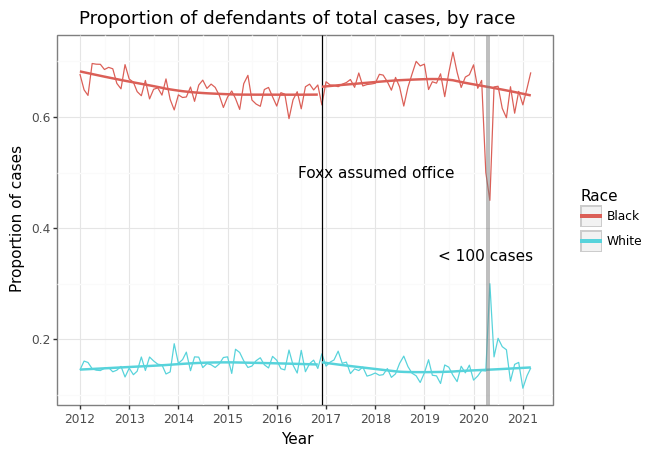

<ggplot: (139991098010)>

In [28]:
# visualizing the defendants proportion across races
(
    ggplot(sentencing_ym, aes(x = 'sentenceym_derived', y = 'prop', color = 'factor(race)', group = 'race')) +
    geom_line() +
    geom_vline(xintercept = '2016-12-01') +
    geom_smooth(data = sentencing_ym.loc[sentencing_ym.sentenceym_derived < '2016-12-01'], se = False) +
    geom_smooth(data = sentencing_ym.loc[sentencing_ym.sentenceym_derived >= '2016-12-01'], se = False) +
    annotate('rect', fill = 'gray', alpha = .5, xmin = pd.to_datetime("2020-04-01"), xmax = pd.to_datetime("2020-05-01"),
            ymin = -(math.inf), ymax = math.inf) +
    annotate('text', x = pd.to_datetime("2018-01-10"), y = .5, label = 'Foxx assumed office') +
    annotate('text', x = pd.to_datetime("2020-04-01"), y = .35, label = '< 100 cases') +
    labs(title = 'Proportion of defendants of total cases, by race', 
         y = 'Proportion of cases',
         x = 'Year') +
    scale_x_date(date_labels = "%Y") +
    guides(color = guide_legend(title = 'Race')) +
    theme_bw()
)

The above graph summarizes the proportion of black and white defendants of total cases in each month. 

This is described by the following expression: $Prop_{r,m} = \frac{\sum_{d=1}^{n} def_{r, d}}{\sum_{d=1}^{n} cases_{d}}$, where $r, m, d, \text{ and } n$ denotes the race group, month, day, and total day in the corresponding month, respectively. $Prop_{r,m}$ signifies the proportion of black and white defendants of all cases in each month. The graph also provides each race group's trendlines before and after State's Attorney Kim Foxx assumed office in December 2016.

We can see that prior to Foxx's entry to office, the prevalence of black defendants (of all cases) was on a relatively declining trend. However, the trend somewhat reversed after Foxx assumed office. Meanwhile, there is no significant trend changes for white defendants. 

The graph also shows a significant decrease (increase) in the proportion of black (white) defendants during April-May 2020. It is worth noting that during this period, the number of unique cases also decreased significantly (see below table). Such small number of cases could potentially drive extreme fluctuation in the proportion for both race groups.  

In [29]:
sentencing_ym[['sentenceym_derived', 'nunique_cases']].drop_duplicates().loc[sentencing_ym.nunique_cases < 100]

,sentenceym_derived,nunique_cases
99,2020-04-01,14
100,2020-05-01,20


## 2.2 Investigating the first type of disparity: probation versus incarceration (10 points)

One type of disparity beyond who arrives at the sentencing stage is whether the defendant receives probation or incaceration.

According to the codebook, incarceration is indicated by `COMMITMENT_TYPE` == "Illinois Department of Corrections"

Recreate the previous plot but where the y axis represents the difference between the following proportions (can be either Black - White or White - Black but make sure to label):

- Percent of black defendants who are incarcerated out of all black defendants that month/year 
- Percent of white defendants who are incarcerated out of all white defendants that month/year 

Briefly interpret the results

In [30]:
# defining whether incarcerated
sentencing_cleaned['incarcerated_black'] = np.where((sentencing_cleaned.COMMITMENT_TYPE == "Illinois Department of Corrections") & (sentencing_cleaned.is_black_derived == True), True, False)
sentencing_cleaned['incarcerated_white'] = np.where((sentencing_cleaned.COMMITMENT_TYPE == "Illinois Department of Corrections") & (sentencing_cleaned.is_white_derived == True), True, False)

# aggregating across all data
incarcerated_ym = sentencing_cleaned.groupby('sentenceym_derived').agg(black_inc = ('incarcerated_black', 'sum'), 
                                                                       white_inc = ('incarcerated_white', 'sum'), 
                                                                       black_def = ('is_black_derived', 'sum'), 
                                                                       white_def = ('is_white_derived', 'sum')).reset_index()

# calculating the incarceration proportion difference between black-white
incarcerated_ym['prop_diff'] = (incarcerated_ym.black_inc / incarcerated_ym.black_def) - (incarcerated_ym.white_inc / incarcerated_ym.white_def)
incarcerated_ym

,sentenceym_derived,black_inc,white_inc,black_def,white_def,prop_diff
0,2012-01-01,674,87,1134,242,0.234852
1,2012-02-01,566,87,941,233,0.228097
2,2012-03-01,602,113,1030,255,0.141329
3,2012-04-01,598,94,1000,211,0.152502
4,2012-05-01,579,73,1074,223,0.211752
...,...,...,...,...,...,...
106,2020-11-01,122,23,298,76,0.106764
107,2020-12-01,170,32,347,85,0.113443
108,2021-01-01,138,22,278,50,0.056403
109,2021-02-01,136,13,320,66,0.228030


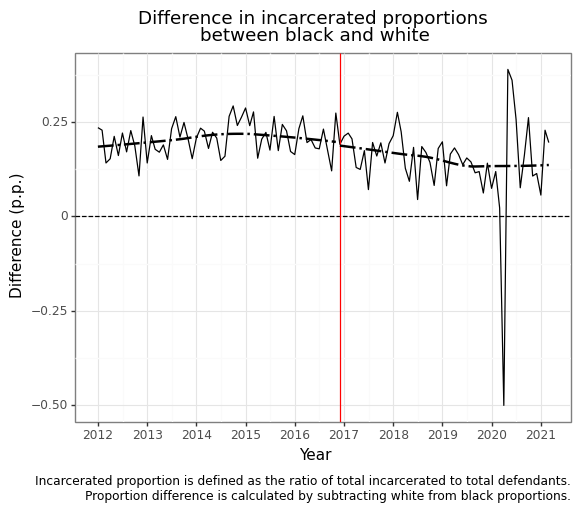

<ggplot: (139991810597)>

In [31]:
# visualizing the prop. difference
(
    ggplot(incarcerated_ym, aes(x = 'sentenceym_derived', y = 'prop_diff', group = 1)) +
    geom_line() +
    geom_hline(yintercept = 0, linetype = 'dashed') +
    geom_vline(xintercept = '2016-12-01', color = 'red') +
    geom_smooth(data = incarcerated_ym.loc[incarcerated_ym.sentenceym_derived < '2016-12-01'], se = False, linetype = 'dashdot') +
    geom_smooth(data = incarcerated_ym.loc[incarcerated_ym.sentenceym_derived >= '2016-12-01'], se = False, linetype = 'dashdot') +
    labs(title = 'Difference in incarcerated proportions \nbetween black and white', x = 'Year', y = 'Difference (p.p.)',
        caption = "Incarcerated proportion is defined as the ratio of total incarcerated to total defendants.\nProportion difference is calculated by subtracting white from black proportions.") +
    scale_x_date(date_labels = "%Y") +
    theme_bw() 
)

The above graph shows that the black-white disparity in incarceration outcomes has been on the decline. This means that a black's probability of being incarcerated conditional on them being a defendant is becoming more similar to that of their white counterparts. However, it is unclear whether this decline has anything to do with State's Attorney Foxx's entry into office, as the declining disparity already started prior to her entry (the smoothed slope first exhibited a decline in early 2015).  

## 2.3 Investigating mechanisms: incarceration rates by charge

Your colleague sees the previous graph and is worried that the gap could be different---either wider or smaller---if you adjust for the fact that prosecutors have discretion in what crimes to charge defendants with. If white defendants are charged with crimes that tend to receive probation rather than incarceration, that could explain some of the gaps.

In the next questions, you'll begin to investigate this.

### 2.3.1 Find the most common offenses (3 points)

First, create a set of 'frequent offenses' that represent (over the entire period) the union of the 10 offenses Black defendant are most likely to be charged with and the 10 offenses white defendants are most likely to be charged with (might be far less than 20 total if there's a lot of overlap in common charges)

Use the `simplified_offense_derived` for this

In [32]:
# generating a row for identifying derived race
sentencing_offenses = sentencing_cleaned.groupby('simplified_offense_derived').agg(black_def = ('is_black_derived', 'sum'),
                                                                                  white_def = ('is_white_derived', 'sum'),
                                                                                  black_inc = ('incarcerated_black', 'sum'), 
                                                                                  white_inc = ('incarcerated_white', 'sum')).reset_index()

# printing the top 10 offenses for black and white defendants
top_offenses_black = sentencing_offenses.sort_values('black_def', ascending = False).head(10)['simplified_offense_derived'].tolist()
top_offenses_white = sentencing_offenses.sort_values('white_def', ascending = False).head(10)['simplified_offense_derived'].tolist()

# creating a set of common offenses by both black and white defendants
frequent_offenses = set(top_offenses_black + top_offenses_white)
frequent_offenses

{'Battery',
 'Burglary',
 'DUI',
 'Driving With Suspended Or Revoked License',
 'Narcotics',
 'Other Offense',
 'Residential Burglary',
 'Retail Theft',
 'Robbery',
 'Theft',
 'UUW - Unlawful Use of Weapon',
 'Vehicle-related'}

### 2.3.2 Look at incarceration rates (again just whether incarcerated) by race and offense type for these top offenses (3 points)

Print a wide-format version of the resulting table (so each row is an offense type, one col is black incarceration rate for that offense type; another is the white incarceration rate) and interpret. What offenses show the largest disparities in judges being less likely to sentence White defendants to incarceration/more likely to offer those defendants probation?


In [33]:
# converting the frequent offenses set into a list 
freqoff = list(frequent_offenses)

# filtering only crimes in the freqoff list 
sentencing_freqoff = sentencing_offenses[sentencing_offenses['simplified_offense_derived'].isin(freqoff)].copy()

# generating additional variables
sentencing_freqoff['black_inc_rate'] = sentencing_freqoff.black_inc / sentencing_freqoff.black_def
sentencing_freqoff['white_inc_rate'] = sentencing_freqoff.white_inc / sentencing_freqoff.white_def
sentencing_freqoff['gap_inc_rate'] = sentencing_freqoff.black_inc_rate - sentencing_freqoff.white_inc_rate

# taking a look at the dataset
sentencing_freqoff.sort_values('gap_inc_rate', ascending = False)

,simplified_offense_derived,black_def,white_def,black_inc,white_inc,black_inc_rate,white_inc_rate,gap_inc_rate
39,Narcotics,29451,4923,15841,1194,0.537876,0.242535,0.295341
5,Battery,4650,1448,2367,399,0.509032,0.275552,0.233480
58,UUW - Unlawful Use of Weapon,9608,527,6689,254,0.696191,0.481973,0.214217
51,Retail Theft,6812,2509,4058,1128,0.595713,0.449582,0.146132
8,Burglary,3798,1454,2514,779,0.661927,0.535763,0.126164
42,Other Offense,1242,569,423,131,0.340580,0.230228,0.110351
20,Driving With Suspended Or Revoked License,4459,1160,2596,576,0.582193,0.496552,0.085642
56,Theft,2623,1095,1015,349,0.386961,0.318721,0.068240
50,Residential Burglary,2282,717,1638,469,0.717791,0.654114,0.063677
15,DUI,3842,1995,1556,682,0.404997,0.341855,0.063143


### 2.3.3 Examine whether this changes pre and post change to charging threshold for retail theft (14 points)

One important question is not only whether there are disparities by offense type but also whether these disparities are changing over time.

The SAO (State Attorney Office), for instance, announced in December of 2016 that they would no longer default to charging retail thefts of under \$1,000 as felonies. This change might have (1) decreased disparities or (2) increased disparities, depending on the correlation between race/ethnicity and magnitude of goods stolen: https://www.dnainfo.com/chicago/20161215/little-village/kim-foxx-raises-bar-for-retail-theft-felonies/. 

Focusing on `simplified_offense_derived` == "Retail theft." Write a user-defined function that allows you to efficiently: 

- Compare Black-White disparities before and after the change using a two-month bandwidth (so pre is October and November 2016; post is January and February 2017)

- Compare Black-White disparities before and after the change using a four-month bandwidth (so pre is August- November 2016; post is January - April 2017)

- Compare Black-White disparities using an eight-month bandwidth

- Compare Black-White disparities using a twelve-month bandwidth

**Note**: Dec. 2016 is always excluded as a transition month

------------------ 

- Print a table with the results (any organization is fine as long as it's clear)  
 
**Resources**:
    
- User-defined function example in lecture on 09/07

In [34]:
# converting sentenceym_derived to datetime object 
sentencing_cleaned['sentenceym_derived'] = pd.to_datetime(sentencing_cleaned.sentenceym_derived)

# keeping only those with retail theft offenses 
sentencing_theft = sentencing_cleaned.loc[sentencing_cleaned.simplified_offense_derived == 'Retail Theft'].copy()

In [35]:
### DEFINING THE FUNCTION

def bwinc_gap(date_str = "12-01-2016", bandwidth = 2):
    """
    The function bwinc_gap() compares the disparity in retail theft incarceration rates between blacks and 
    whites. Incarceration rates are defined as the ratio of total incarcerated defendants of total defendants
    charged with retail theft offenses within each race group. 
    
    The blwh_gap measures the black-white incarceration disparity, 
    wherein positive (negative) values imply blacks (whites) are more likely to face incarceration.
    
    The function takes in two arguments: date_str and bandwidth.
    date_str takes on the specified comparison cutoff date in character format, provided in the format "%m-%d-%Y". 
    The date_str value defaults to 12-01-2016 (1 December 2016), which is the date that 
    State's Attorney Kim Foxx assumed office. 
    bandwidth argument takes on an integer value, and this determines the width of the comparison in months.
    
    The dataframe used in the function is hard-coded into the function: here, the function
    will operate on the sentencing_theft dataframe.
    """
    # MOCK TEST-defining the function inputs
    #date_str = "12-01-2016"
    date_cutoff = pd.to_datetime(date_str)
    #bandwidth = 2

    # first, we define the month bandwidth cutoffs 
    cutoff_pre = date_cutoff - relativedelta(months=bandwidth) 
    cutoff_post = date_cutoff + relativedelta(months=bandwidth) 

    # next, we assign the pre-post category based on the cutoffs. There are 3 categories: Pre-, Post-, NA
    sentencing_theft['pre_post'] = np.where(
        (sentencing_theft.sentenceym_derived < date_cutoff) & (sentencing_theft.sentenceym_derived >= cutoff_pre), "Pre",
        np.where(
            (sentencing_theft.sentenceym_derived > date_cutoff) & (sentencing_theft.sentenceym_derived <= cutoff_post), 
            "Post", "NA"
        )
    )

    # we only keep the non-NA rows
    sentencing_theft_prepost = sentencing_theft[sentencing_theft.pre_post != "NA"].copy()
    
    # we then perform the aggregation
    sentencing_prepost_agg = sentencing_theft_prepost.groupby(['pre_post']).agg(black_def = ("is_black_derived", "sum"),
                                                                                white_def = ("is_white_derived", "sum"), 
                                                                                black_inc = ("incarcerated_black", "sum"), 
                                                                                white_inc = ("incarcerated_white", "sum")).reset_index()

    # we create the disparity measure 
    sentencing_prepost_agg['blwh_gap'] = (sentencing_prepost_agg.black_inc / sentencing_prepost_agg.black_def) - \
                                         (sentencing_prepost_agg.white_inc / sentencing_prepost_agg.white_def)

    # defining the bandwidth column
    sentencing_prepost_agg['bandwidth'] = bandwidth

    # reordering the columns
    cols = sentencing_prepost_agg.columns.to_list()
    cols = ['bandwidth'] + cols[:1] + cols[1:-1]
    sentencing_prepost_agg = sentencing_prepost_agg[cols]
    sentencing_prepost_agg = pd.DataFrame(sentencing_prepost_agg)
    
    # transforming the pre-post column as categories
    sentencing_prepost_agg['pre_post'] = sentencing_prepost_agg.pre_post.astype('category')
    sentencing_prepost_agg['pre_post'] = sentencing_prepost_agg['pre_post'].cat.reorder_categories(['Pre', 'Post'])

    # sorting the pre-post column 
    sentencing_prepost_agg = sentencing_prepost_agg.sort_values("pre_post")
    
    # returning the final dataframe 
    return sentencing_prepost_agg

In [36]:
# storing the 2, 4, 8, 12 bandwidths in a list 
bw_list = [2, 4, 8, 12]

# defining empty DF for appending each iteration
inc_gap_df = pd.DataFrame()

# applying a list comprehension to print out the measured disparity across different bandwidths
for b in bw_list:
    temp_df = bwinc_gap(date_str = "12-01-2016", bandwidth=b)
    inc_gap_df = pd.concat([inc_gap_df, temp_df], ignore_index=True)
    
# printing the result
inc_gap_df

,bandwidth,pre_post,black_def,white_def,black_inc,white_inc,blwh_gap
0,2,Pre,182,52,114,28,0.087912
1,2,Post,188,69,70,15,0.154949
2,4,Pre,376,130,210,62,0.081588
3,4,Post,284,112,117,37,0.081615
4,8,Pre,703,266,400,116,0.132900
5,8,Post,458,180,226,81,0.043450
6,12,Pre,1057,384,614,161,0.161618
7,12,Post,560,213,286,95,0.064705


The above table shows black-white incarceration disparity for retail theft crimes across different pre- and post-cutoff periods as well as  different bandwidth measures. 

- Use that table to create a bar chart where the x axis represents different bandwidths (2, 4, etc); the y axis the size of the Black-White gap, and for each of the x axis points, you have one shaded bar representing "before" the change, another representing "after" the change (make sure that before is ordered before after and the bandwidths are from smallest to largest)

*Note*: for each of the bandwidths include dates spanning the entire month (e.g., for the first, include not only 02-01-2017 but everything up through 02-28-2017; easiest way is for the subsetting to use the rounded `sentenceym_derived`. Also make sure to only include white or black defendants.


**Hint**: depending on how you calculate/reshape things, you may find this issue useful for how to collapse column names with a multilevel index (also may not need it depending on how you structure the code): https://stackoverflow.com/questions/24290297/pandas-dataframe-with-multiindex-column-merge-levels


**Extra credit**: because the bandwidths have different sample sizes, a better viz incorporates measures of uncertainty. Add standard errors to the points using the formula: $(\dfrac{p(1-p)}{n})^{0.5}$ where N is the number of cases in each bandwidth period

In [37]:
# adding the standard errors
inc_gap_df['se'] = ((inc_gap_df.blwh_gap*(1-inc_gap_df.blwh_gap))/(inc_gap_df.black_def + inc_gap_df.white_def))**0.5     # N = black + white defendants

# for the ymin and ymax error bars 
inc_gap_df['ymin'] = inc_gap_df.blwh_gap - inc_gap_df.se
inc_gap_df['ymax'] = inc_gap_df.blwh_gap + inc_gap_df.se
inc_gap_df

,bandwidth,pre_post,black_def,white_def,black_inc,white_inc,blwh_gap,se,ymin,ymax
0,2,Pre,182,52,114,28,0.087912,0.018511,0.069401,0.106423
1,2,Post,188,69,70,15,0.154949,0.022572,0.132377,0.177521
2,4,Pre,376,130,210,62,0.081588,0.012169,0.069419,0.093757
3,4,Post,284,112,117,37,0.081615,0.013758,0.067857,0.095372
4,8,Pre,703,266,400,116,0.132900,0.010905,0.121995,0.143805
5,8,Post,458,180,226,81,0.043450,0.008071,0.035379,0.051521
6,12,Pre,1057,384,614,161,0.161618,0.009697,0.151922,0.171315
7,12,Post,560,213,286,95,0.064705,0.008848,0.055857,0.073553


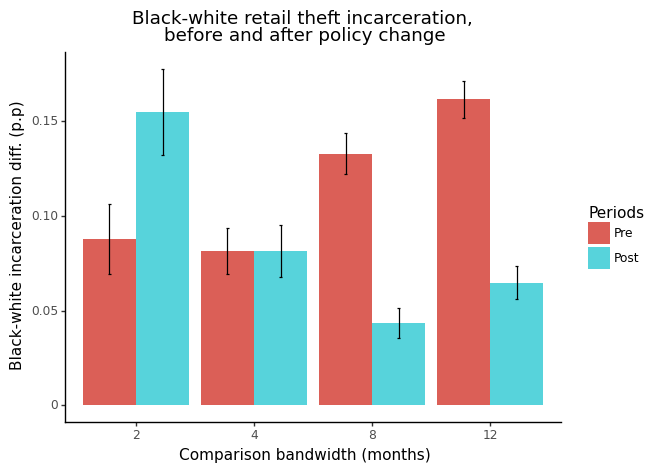

<ggplot: (139991885888)>

In [38]:
# drawing the visualization
(
    ggplot(inc_gap_df, aes(x = "factor(bandwidth)", y = "blwh_gap", fill = "pre_post")) +
    geom_bar(stat = 'identity', position = position_dodge()) +
    geom_errorbar(aes(ymin = "ymin", ymax = "ymax"), width = .05, position = position_dodge(.9)) +
    labs(x = "Comparison bandwidth (months)", 
         y = "Black-white incarceration diff. (p.p)", 
         title = "Black-white retail theft incarceration, \nbefore and after policy change") +
    theme_classic() +
    guides(fill = guide_legend(title = "Periods")) +
    theme(plot_caption = element_text(size = 8))
)

### 2.3.4 Interpret the results (1 point)

Write a two-sentence interpretation of the results. What might this show about how people on both sides of the issue---those arguing the policy change will narrow disparities; those arguing the change may widen disparities--could support their claims? 

The results show that–at least with large enough bandwidths (8 and 12 months before-after the policy cutoff)–there seems to be a decrease in disparity between black and white retail theft incarceration after the SAO raised the bar for retail theft felony. This fact would support the claim for those arguing that raising the bar for theft felony would narrow the existing disparity.

# 3. Extra credit (2 points)

The above question asked about black-white disparities before and after the policy change. Write a new user-defined function that:

- Has an argument(s) to indicate the levels of the `RACE` variable in the original data that will constitute two groups to compare: group 1 and group 2 (eg in one execution of the function, group 1 might be non-Hispanic white; group 2 might be Hispanic and Black; in another execution, group 1 might be Asian; group 2 but might be Hispanic. Note all levels need to be included in a group)
- Can be used to calculate the same bandwidth-specific disparities as above for defendants in those two groups
- Returns a table or plot with the results


In [39]:
# defining the function groupinc_gap
def groupinc_gap(group_1 = "Black", group_2 = "White", date_str = "12-01-2016", bandwidth = 2):
    
    # defining the defendants from each groups
    sentencing_theft['is_group1'] = np.where(sentencing_theft.RACE == group_1, True, False)
    sentencing_theft['is_group2'] = np.where(sentencing_theft.RACE == group_2, True, False)
    
    # defining whether incarcerated
    sentencing_theft['is_group1_incarcerated'] = np.where((sentencing_theft['is_group1'] == True) & (sentencing_theft.COMMITMENT_TYPE == "Illinois Department of Corrections"), True, False)
    sentencing_theft['is_group2_incarcerated'] = np.where((sentencing_theft['is_group2'] == True) & (sentencing_theft.COMMITMENT_TYPE == "Illinois Department of Corrections"), True, False)
    
    # defining the date cutoff
    date_cutoff = pd.to_datetime(date_str)

    # first, we define the month bandwidth cutoffs 
    cutoff_pre = date_cutoff - relativedelta(months=bandwidth) 
    cutoff_post = date_cutoff + relativedelta(months=bandwidth) 

    # next, we assign the pre-post category based on the cutoffs. There are 3 categories: Pre-, Post-, NA
    sentencing_theft['pre_post'] = np.where(
        (sentencing_theft.sentenceym_derived < date_cutoff) & (sentencing_theft.sentenceym_derived >= cutoff_pre), "Pre",
        np.where(
            (sentencing_theft.sentenceym_derived > date_cutoff) & (sentencing_theft.sentenceym_derived <= cutoff_post), 
            "Post", "NA"
        )
    )

    # we only keep the non-NA rows
    sentencing_theft_prepost = sentencing_theft[sentencing_theft.pre_post != "NA"].copy()
    
    # we then perform the aggregation
    sentencing_prepost_agg = sentencing_theft_prepost.groupby(['pre_post']).agg(group1_def = ("is_group1", "sum"),
                                                                                group2_def = ("is_group2", "sum"), 
                                                                                group1_inc = ("is_group1_incarcerated", "sum"), 
                                                                                group2_inc = ("is_group2_incarcerated", "sum")).reset_index()

    # we create the disparity measure 
    sentencing_prepost_agg['blwh_gap'] = (sentencing_prepost_agg.group1_inc / sentencing_prepost_agg.group1_def) - \
                                         (sentencing_prepost_agg.group2_inc / sentencing_prepost_agg.group2_def)

    # defining the bandwidth column
    sentencing_prepost_agg['bandwidth'] = bandwidth
    
    # defining the group1 and group2 column 
    sentencing_prepost_agg['group_1'] = group_1
    sentencing_prepost_agg['group_2'] = group_2
    
    # transforming into dataframe
    sentencing_prepost_agg = pd.DataFrame(sentencing_prepost_agg)
    
    # transforming the pre-post column as categories
    sentencing_prepost_agg['pre_post'] = sentencing_prepost_agg.pre_post.astype('category')
    sentencing_prepost_agg['pre_post'] = sentencing_prepost_agg['pre_post'].cat.reorder_categories(['Pre', 'Post'])

    # sorting the pre-post column 
    sentencing_prepost_agg = sentencing_prepost_agg.sort_values("pre_post")
    
    # returning the final dataframe 
    return sentencing_prepost_agg

In [40]:
# EXAMPLE: group_1 == "Black", group_2 == "White"
groupinc_gap(group_1= "Black", group_2 = "White", date_str="12-01-2016", bandwidth = 12)

,pre_post,group1_def,group2_def,group1_inc,group2_inc,blwh_gap,bandwidth,group_1,group_2
1,Pre,1022,384,604,161,0.171727,12,Black,White
0,Post,549,213,281,95,0.065830,12,Black,White
